In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import regex
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Flatten, SimpleRNN, LSTM, GRU, Bidirectional 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("train.csv")

In [3]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
# Remove hashtags and Mentions
df["tweet"] = df['tweet'].str.replace('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)','')
df.head()

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide society now motivation


In [5]:
#Removing Ascii Characters from the DataFrame
df.tweet.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)

In [6]:
# Removing Punctuation with string library
df['tweet'].str.replace('[{}]'.format(string.punctuation), '')

0          when a father is dysfunctional and is so sel...
1          thanks for lyft credit i cant use cause they...
2                                      bihday your majesty
3        model   i love u take with u all the time in u...
4                     factsguide society now    motivation
                               ...                        
31957                                 ate  isz that youuu 
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960     sikh temple vandalised in in calgary wso cond...
31961                          thank you  for you follow  
Name: tweet, Length: 31962, dtype: object

In [7]:
#Removing Ascii Characters from the DataFrame
df.tweet.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)

In [8]:
# Removing Punctuation from the DataFrame using pandas str and regex
df["tweet"] = df['tweet'].str.replace('[^\w\s]','')

In [9]:
df.head()

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide society now motivation


In [10]:
## Remove emoji

import re

def demojify(text):
    regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
                           "]+", flags = re.UNICODE)
    return regex_pattern.sub(r'',text)


df["tweet"] = df["tweet"].apply(demojify)

In [11]:
# Removing StopWords using scikit learn library
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS
pat = r'\b(?:{})\b'.format('|'.join(stop))
df['tweet'] = df['tweet'].str.replace(pat, '')
df['tweet'] = df['tweet'].str.replace(r'\s+', ' ')

In [12]:
# Removing Stopwords with Gensim
import gensim
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
df.tweet.apply(remove_stopwords)
df.head()

,id,label,tweet
0,1,0,father dysfunctional selfish drags kids dysfu...
1,2,0,thanks lyft credit use cause dont offer wheel...
2,3,0,bihday majesty
3,4,0,model love u u time ur
4,5,0,factsguide society motivation


In [13]:
wordcloud = ' '.join(df["tweet"])

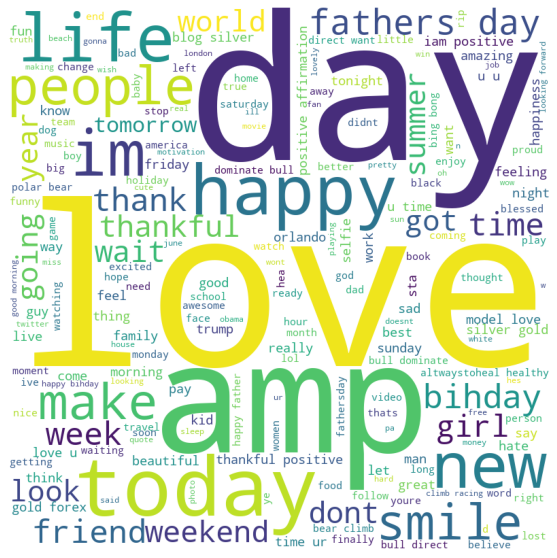

In [14]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

wc.generate(wordcloud)

plt.figure(figsize = (10,10)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [15]:
X = df['tweet']
y = df['label']

In [16]:
cv = CountVectorizer(stop_words="english")

X = cv.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [18]:
from imblearn.over_sampling import SMOTE
X_train_smote , y_train_smote = SMOTE().fit_resample(X_train.astype("float"),y_train)

In [19]:
from collections import Counter

In [20]:
print("Before Smoting :",Counter(y_train))
print("After Smoting :",Counter(y_train_smote))

Before Smoting : Counter({0: 20780, 1: 1593})
After Smoting : Counter({0: 20780, 1: 20780})


In [21]:
from sklearn.metrics import classification_report as cr , confusion_matrix as cm , accuracy_score as ac

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [23]:
logreg = LogisticRegression()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=300)

In [24]:
def model(model):
    model.fit(X_train_smote,y_train_smote)
    ypred = model.predict(X_test)
    print(cr(y_test,ypred))
    print(ac(y_test,ypred))

In [25]:
model(logreg)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      8940
           1       0.42      0.79      0.55       649

    accuracy                           0.91      9589
   macro avg       0.70      0.85      0.75      9589
weighted avg       0.95      0.91      0.92      9589

0.9120867660861404


In [26]:
model(dtree)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      8940
           1       0.62      0.52      0.57       649

    accuracy                           0.95      9589
   macro avg       0.79      0.75      0.77      9589
weighted avg       0.94      0.95      0.94      9589

0.9463969131296277


In [27]:
model(rf)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8940
           1       0.82      0.51      0.63       649

    accuracy                           0.96      9589
   macro avg       0.90      0.75      0.80      9589
weighted avg       0.96      0.96      0.95      9589

0.9594326832829283
